b0: 0.02882261736022052
b1: 1.3651298487714938
Среднеквадратичная ошибка: 86.11244999999997
Стандартная ошибка: 9.3
Среднестатистическая ошибка: 15.3
Квадратичная сумма: 2106.6772099999994
Регрессионная сумма: 1388.57669
Ошибочная сумма: 881.1244999999997
Коэффициент детерминации: 0.6591
Коэффициент корреляции: 0.7642


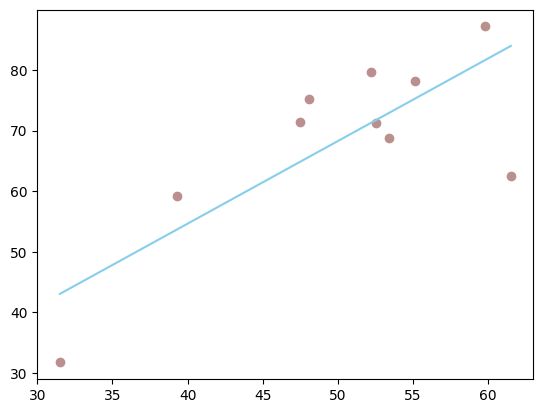

In [7]:
import copy
import math
from matplotlib import pyplot as plt
import numpy as np


data = [[31.5,31.7],
        [53.42,68.7],
        [61.5,62.56],
        [47.47,71.5],
        [59.8,87.2],
        [55.1,78.2],
        [52.2,79.6],
        [39.29,59.17],
        [48.1,75.3],
        [52.5,71.3]]
x = np.ones(10)
y = np.ones(10)
for i in range(len(data)):
    x[i] = data[i][0]
    y[i] = data[i][1]


b0 = 0 #Коэффициент, определяющий точку пересечения линии с осью y
b1 = 0#Величина, на которую изменяется значение выходной переменной y при изменении входной переменной x на единицу.
lr = 0.0001  #Шаг в направлении градиента(Коэффициент скорости обучения)
iterations = 100
n = len(x)


for i in range(iterations): #Поиск наименьшого значения методом градиентного спуска
    y_model = b0 + b1 * x
    loss = 1 / n * (sum((y - y_model) ** 2)) #Среднеквадратичная функция потерь(отклонение)
    #Считаем градиент
    db0 = (-2 * sum(x * (y - y_model))) / n  #Прозводная по b0
    db1 = (-2 * sum(y - y_model)) / n  #Производная по b1

    b0 = b0 - lr * db1  # Новое значение b0
    b1 = b1 - lr * db0  #Новое значение b1
Lr = b0 + b1 * x
def r():
    xy = 0
    x = 0
    y = 0
    x2 = 0
    y2 = 0
    n = len(data)
    for strng in data:
        xy += (strng[0] * strng[1])
        x += strng[0]
        y += strng[1]
        x2 += strng[0] ** 2
        y2 += strng[1] ** 2
    return (xy - (x * y) / n) / (math.sqrt(x2 - x ** 2 / n) * math.sqrt(y2 - y ** 2 / n))

def function(x, pb0, pb1):
    return round(eval(str(pb0) + '+' + str(pb1) + '*x'), 1)


plt.scatter(x, y, color ='rosybrown') #Вывод точек
plt.plot([min(x), max(x)], [min(Lr), max(Lr)], color='skyblue') #Вывод линейной регрессии


y_h = []

ymid = sum(list(map(list, zip(*data)))[1]) / len(data)
xmid = sum(list(map(list, zip(*data)))[0]) / len(data)
for string in data:
    y_h.append(function(string[0], b0, b1))

q = 0
qr = 0
qe = 0
for i in range(len(data)):
    q += (data[i][1] - ymid) ** 2  # Квадратичная сумма
    qr += (y_h[i] - ymid) ** 2  # Регрессионная сумма
    qe += (data[i][1] - y_h[i]) ** 2  # Ошибочная сумма
r2 = round(qr / q, 4)  # Коэфициент детерминации
r = round(r(), 4)  # Коэффициент корреляции
tab = copy.deepcopy(data)
tab.append([])
for i in range(len(tab)-1):
    tab[i].append(ymid)
    tab[i].append(tab[i][1] - ymid)
    tab[i].append((tab[i][1] - ymid) ** 2)
    tab[i].append(y_h[i])
    tab[i].append(tab[i][1] - y_h[i])
    tab[i].append((tab[i][1] - y_h[i]) ** 2)
    tab[i].insert(0, i + 1)
for i in range(len(tab[0])):
    tab[-1].append('')

e = 0
for i in range(len(data)):
    e += ((data[i][1] - y_h[i]) ** 2)
e = e/len(data) - 2
es = math.sqrt(sum(list(map(list, zip(*tab)))[5][:-1]) / (len(data) - 1))
print('b0:', b0)
print('b1:', b1)
print('Среднеквадратичная ошибка:', str(e))
print('Стандартная ошибка:', str(round(math.sqrt(e), 1)))
print('Среднестатистическая ошибка:', str(round(es, 1)))
print('Квадратичная сумма:', str(q))
print('Регрессионная сумма:', str(qr))
print('Ошибочная сумма:', str(qe))
print('Коэффициент детерминации:', str(r2))
print('Коэффициент корреляции:', str(r))
plt.show()
